In [55]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

sigmoid(np.array([0,2,3,4,5,]))

### initialize parameter


w,b=initialize_with_zeros(X.shape[1])
m=X.shape[1]
A=sigmoid(np.dot(X,w)+b)
dw=1./m*np.dot(X.T,(A-y))
A.shape





dim=3
w,b=initialize_with_zeros(dim)
print('w = '+ str(w))
print('b = '+ str(b))

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propogate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


import numpy as np
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

In [57]:
train=pd.read_csv('train.csv')
train.head()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

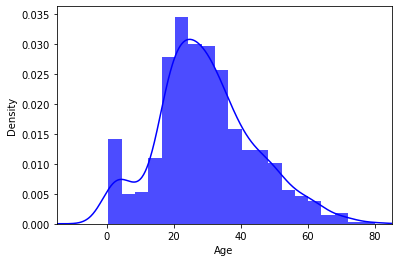

In [58]:
ax=train['Age'].hist(bins=20,density=True,stacked=True,color='blue',alpha=0.7)
train['Age'].plot(kind='density',color='blue')
ax.set(xlabel='Age')
plt.xlim(-15,85)
plt.show()

In [59]:
print(' mean of age is %.2f'%(train['Age'].mean()))

 mean of age is 29.70


In [60]:
print(' median of age is %.2f'%(train['Age'].median()))

 median of age is 28.00


S    644
C    168
Q     77
Name: Embarked, dtype: int64


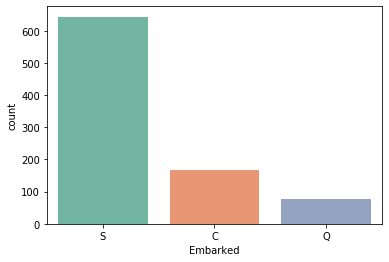

In [61]:
import seaborn as sns
print(train['Embarked'].value_counts())
sns.countplot(x='Embarked',data=train,palette='Set2')

In [62]:
print('The most common boarding port of embarkation is %s.' %train['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [63]:
train_data=train.copy()
train_data['Age'].fillna(train['Age'].median(skipna=True),inplace=True)
train_data['Embarked'].fillna(train['Embarked'].value_counts().idxmax(),inplace=True)
train_data.drop('Cabin',axis=1,inplace=True)

In [64]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

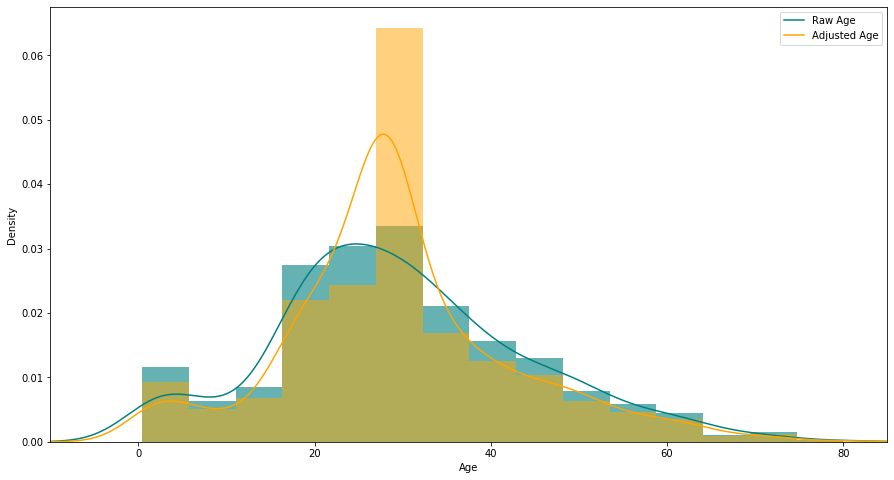

In [65]:

plt.figure(figsize=(15,8))
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()



In [66]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)





In [67]:
trainning=pd.get_dummies(train_data,columns=['Pclass','Embarked','Sex'])

In [68]:
trainning.drop(['Sex_female','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [69]:
trainning.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


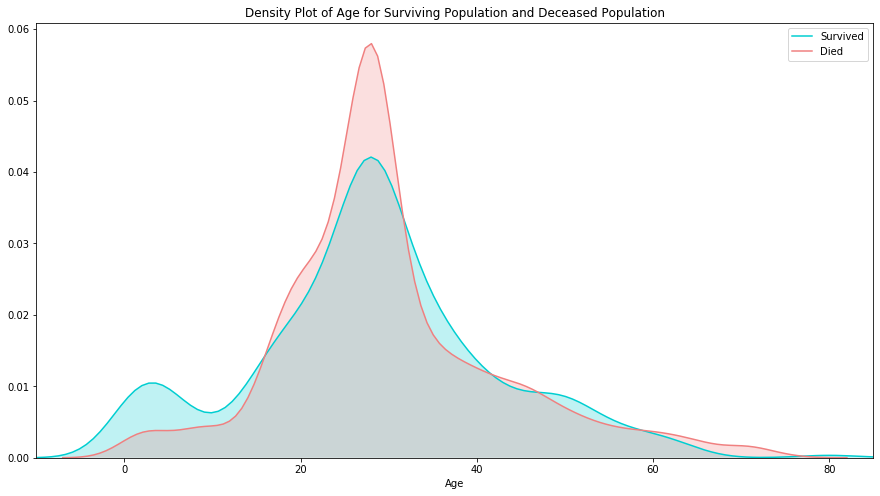

In [70]:
plt.figure(figsize=(15,8))
ax=sns.kdeplot(trainning['Age'][trainning.Survived==1],color="darkturquoise", shade=True)
ax=sns.kdeplot(trainning['Age'][trainning.Survived==0],color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

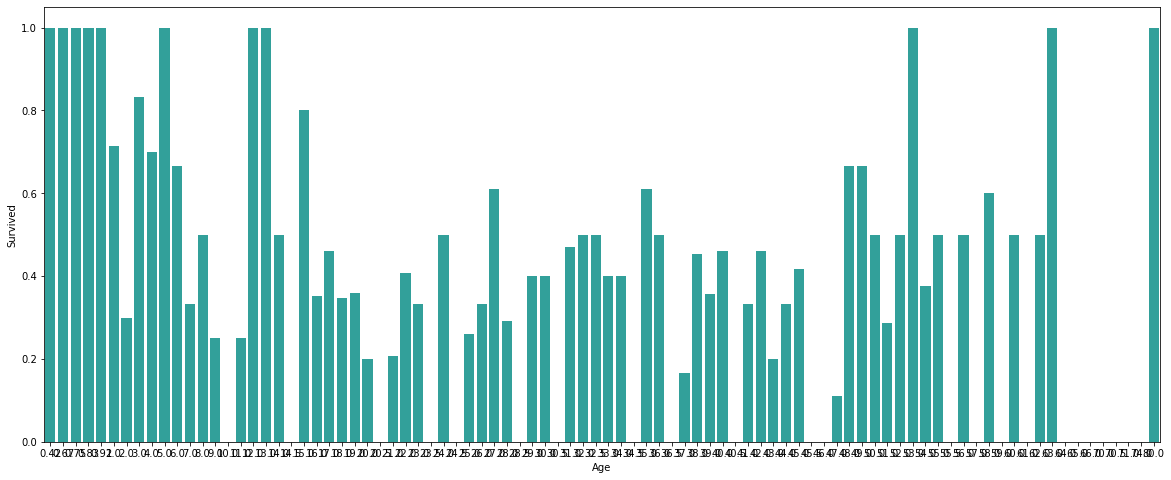

In [71]:
plt.figure(figsize=(20,8))
avg=trainning[['Age','Survived']].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg, color="LightSeaGreen")
plt.show()

In [72]:
trainning['IsMinor']=np.where(trainning['Age']<=16,1,0)

In [73]:
trainning.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0


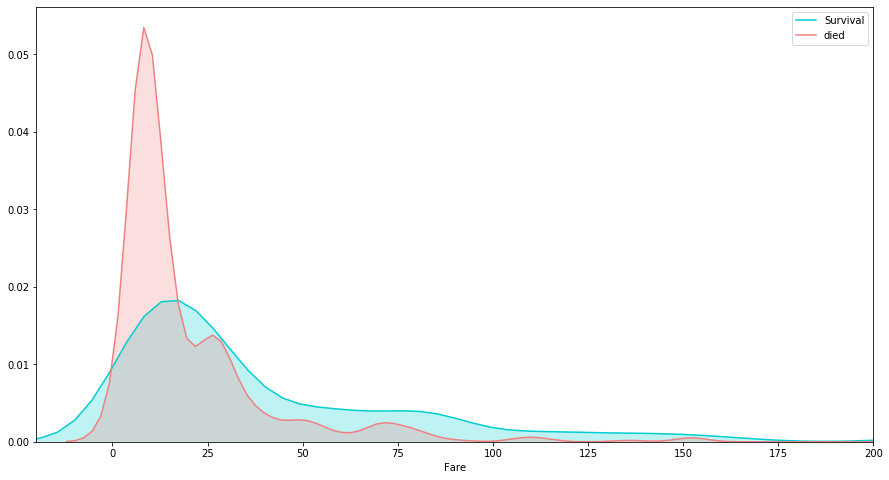

In [74]:
plt.figure(figsize=(15,8))
ax=sns.kdeplot(trainning['Fare'][trainning.Survived==1],color='darkturquoise',shade=True)
sns.kdeplot(trainning['Fare'][trainning.Survived==0],color='lightcoral',shade=True)
plt.legend(['Survival','died'])
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

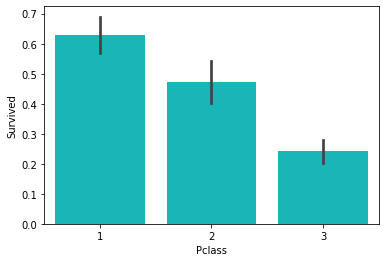

In [75]:
sns.barplot('Pclass', 'Survived', data=train_data, color="darkturquoise")

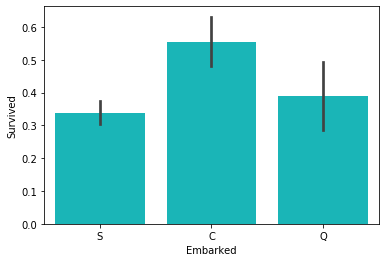

In [76]:
sns.barplot('Embarked', 'Survived', data=train_data, color="darkturquoise")

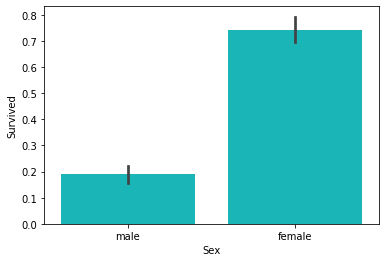

In [77]:
sns.barplot('Sex', 'Survived', data=train_data, color="darkturquoise")

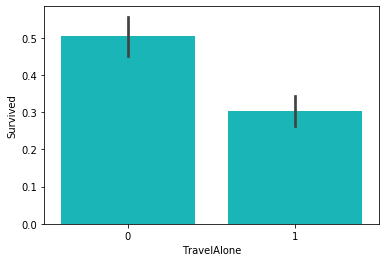

In [78]:
sns.barplot('TravelAlone', 'Survived', data=train_data, color="darkturquoise")

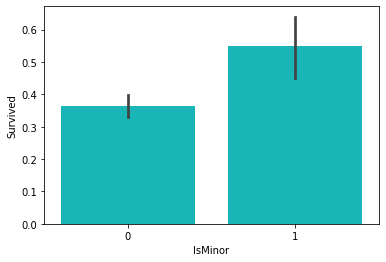

In [79]:
sns.barplot('IsMinor', 'Survived', data=trainning, color="darkturquoise")

In [80]:
trainning.head().drop(['Pclass_3','Embarked_Q',],axis=1)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,0,1,1,0


In [81]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]

In [82]:
X=trainning[cols]

In [83]:
X.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_S,Sex_male,IsMinor
0,22.0,7.2500,0,0,0,0,1,1,0
1,38.0,71.2833,0,1,0,1,0,0,0
2,26.0,7.9250,1,0,0,0,1,0,0
3,35.0,53.1000,0,1,0,0,1,0,0
4,35.0,8.0500,1,0,0,0,1,1,0


In [84]:
X['Fare']=X['Fare']/X['Fare'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
X.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_S,Sex_male,IsMinor
0,22.0,0.225126,0,0,0,0,1,1,0
1,38.0,2.213478,0,1,0,1,0,0,0
2,26.0,0.246086,1,0,0,0,1,0,0
3,35.0,1.648853,0,1,0,0,1,0,0
4,35.0,0.249967,1,0,0,0,1,1,0


In [86]:
X['Age']=X['Age']/X['Age'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
X.head()


,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_S,Sex_male,IsMinor
0,0.749278,0.225126,0,0,0,0,1,1,0
1,1.294208,2.213478,0,1,0,1,0,0,0
2,0.885511,0.246086,1,0,0,0,1,0,0
3,1.192034,1.648853,0,1,0,0,1,0,0
4,1.192034,0.249967,1,0,0,0,1,1,0


In [88]:
y=trainning[['Survived']]
Y=y

In [89]:
x_train=X

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [91]:
#iris = datasets.load_iris()

X = iris.data[:, :2]
y = (iris.target != 0) * 1
y

In [92]:
X

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_S,Sex_male,IsMinor
0,0.749278,0.225126,0,0,0,0,1,1,0
1,1.294208,2.213478,0,1,0,1,0,0,0
2,0.885511,0.246086,1,0,0,0,1,0,0
3,1.192034,1.648853,0,1,0,0,1,0,0
4,1.192034,0.249967,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
886,0.919569,0.403674,1,0,1,0,1,1,0
887,0.647104,0.931555,1,1,0,0,1,0,0
888,0.953627,0.728166,0,0,0,0,1,0,0
889,0.885511,0.931555,1,1,0,1,0,1,0


In [93]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s


In [94]:
def initialize_with_zeros(dim):
    np.random.seed(2)
    w=np.random.randn(dim,1)
    
    b=0
    return w,b

In [95]:
def propogate(w,b,X,Y):
    import numpy as np
    m=X.shape[1]
    
    A=sigmoid(np.dot(X,w)+b)
    cost=-1./m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    dw=1./m*np.dot(X.T,(A-Y))
    db=1./m*np.sum((A-Y))
    
    grads={'dw':dw,
           'db':db
        }
    return grads,cost
    

In [96]:

m=X.shape[1]

dw=1./m*np.dot(X.T,(A-Y))
db=1./m*np.sum((A-Y))
db*2
b-0.1*db

for i in range(10000):
    grads,cost=propogate(w,b,X,Y)
    w=w-0.1*dw
    b=b-0.1*db
print(w) 
print(b)

In [97]:

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = True):
    
  
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propogate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w-learning_rate * dw
        b = b-learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [98]:
m=X.shape[0]
m

891

params, grads, costs=optimize(w, b, X, Y, num_iterations=100, learning_rate=0.1, print_cost = False)

In [99]:
def predict(w,b,X):
    m=X.shape[0]
    y_prediction=np.zeros((1,m))
    #w=w.reshape(X.shape[0],2)

    A=sigmoid(np.dot(X,w)+b)
    
    
    for i in range(A.shape[1]):
        if A.T[0,i]>0.5:
            y_prediction[0,i]=1
        else:
            y_prediction[0,i]=0
                                         
    return y_prediction   



In [100]:
def model(X_train, Y_train,  num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    # initialize with parameters
    w,b=initialize_with_zeros(x_train.shape[1])
    
    
    # Gadient descent
    
    parameters,grads,costs=optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w=parameters['w']
    b=parameters['b']
    
    #prediction
    #y_prediction_test=predict(w,b,X_test)
    y_prediction_train=predict(w,b,X_train)
    
    
    #print train test error
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - Y)) * 100))
    #print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         #"Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [101]:
x_train=X
Y=y

In [102]:
d=model(X,y,num_iterations = 2000, learning_rate = 0.005, print_cost = True)
d

Cost after iteration 0: 89.751302


ValueError: Length of passed values is 891, index implies 1.

In [ ]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(x_train, y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()